### Import required packages

In [1]:
# import required packages
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization
import warnings  # to suppress unnecessary warnings

# Suppress warnings to enhance code readability
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
# reads 'ds4.xls' as a pandas dataframe
df = pd.read_excel("../data/DS4.xls", engine="xlrd")

# displays the top 5 rows of the dataframe
df.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X1,X2,X3,X4,X5
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


### Handling Missing Values

In [3]:
# counting null values in each column of the dataframe
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

### Summary Statistics

In [4]:
# gives summary stats for each field in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,54.0,6.587037,0.458894,5.700,6.22500,6.6500,6.90000,7.600
X2,54.0,209.907407,30.265036,105.000,185.00000,212.5000,235.00000,263.000
X3,54.0,0.449111,0.056551,0.291,0.41525,0.4435,0.48350,0.599
X4,54.0,0.741852,0.100146,0.244,0.71300,0.7535,0.79525,0.900
X5,54.0,11.790741,5.899257,2.800,8.15000,10.7500,13.60000,27.400


### Outliers Removal

In [5]:
# calculate z-scores for each element in the dataFrame
# define a threshold for identifying outliers (e.g., z-score > 3 for extreme outliers)
np.where(df.apply(lambda x: (x - x.mean()) / x.std()) > 3)

(array([], dtype=int64), array([], dtype=int64))

In [6]:
# remove rows with outliers based on the threshold
df.drop(np.where(df.apply(lambda x: (x - x.mean()) / x.std()) > 3)[0], inplace=True)

### Data Normalization

In [7]:
# normalize each column in the DataFrame 'df' by subtracting the mean and dividing by the standard deviation.
df = df.apply(lambda x: (x - x.mean()) / x.std())

### Data Visualization

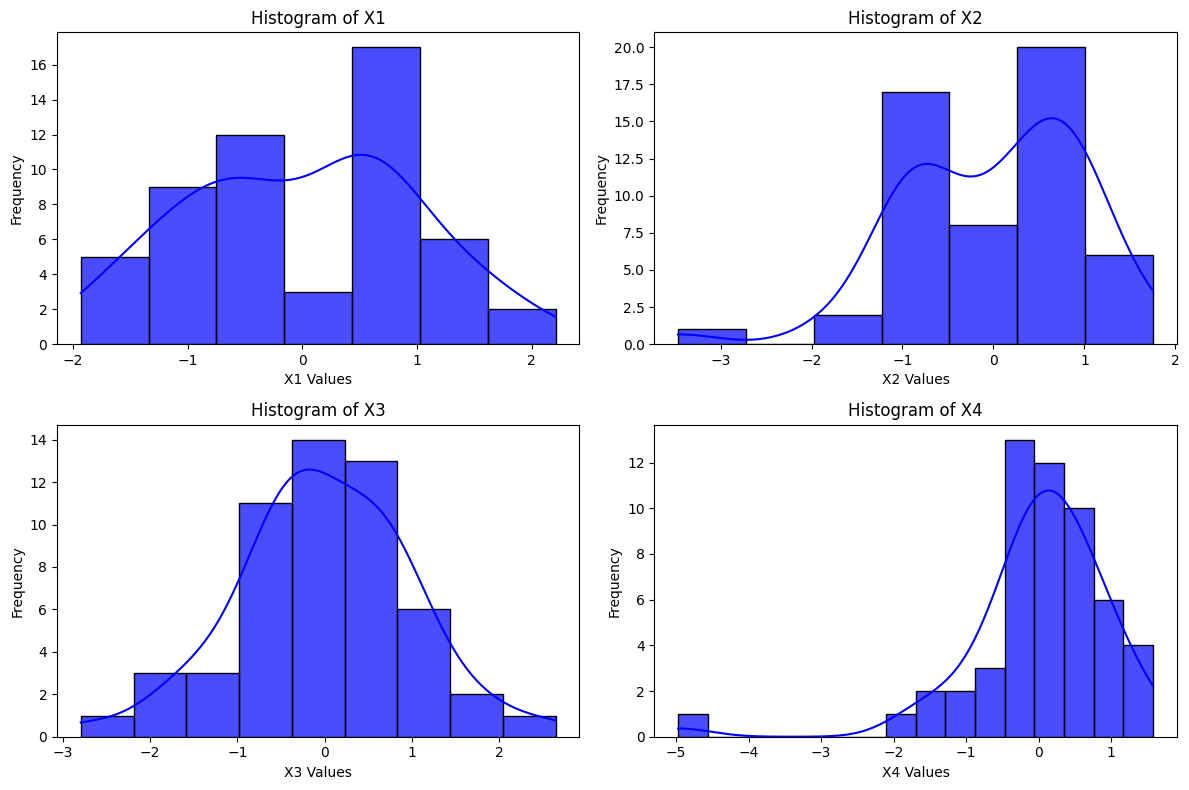

In [8]:
# create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# plot a histogram for the 'X1' column
sns.histplot(df["X1"], color="blue", alpha=0.7, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of X1")
axes[0, 0].set_xlabel("X1 Values")
axes[0, 0].set_ylabel("Frequency")

# plot a histogram for the 'X2' column
sns.histplot(df["X2"], color="blue", alpha=0.7, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Histogram of X2")
axes[0, 1].set_xlabel("X2 Values")
axes[0, 1].set_ylabel("Frequency")

# plot a histogram for the 'X3' column
sns.histplot(df["X3"], color="blue", alpha=0.7, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Histogram of X3")
axes[1, 0].set_xlabel("X3 Values")
axes[1, 0].set_ylabel("Frequency")

# plot a histogram for the 'X4' column in the third subplot
sns.histplot(df["X4"], color="blue", alpha=0.7, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Histogram of X4")
axes[1, 1].set_xlabel("X4 Values")
axes[1, 1].set_ylabel("Frequency")

# ensure proper spacing between subplots
plt.tight_layout()

# show the plot
plt.show()

### Model Building

In [9]:
def multiple_linear_regression(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    """
    Perform multiple linear regression to calculate beta coefficients.

    Args:
        X (np.ndarray): The predictor variables matrix with shape (n_samples, n_features).
        Y (np.ndarray): The target variable vector with shape (n_samples,).

    Returns:
        np.ndarray: The beta coefficients, including the intercept (b0), with shape (n_features + 1,).
    """
    X = np.column_stack((np.ones(len(X)), X))
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta


def mse(y: pd.Series, y_pred: np.ndarray) -> float:
    """
    Calculate the Mean Squared Error (MSE) between the actual and predicted values for multiple linear regression.

    Args:
        y (pd.Series): The actual target values.
        y_pred (np.ndarray): The predicted values.

    Returns:
        float: The MSE.
    """
    return ((y - y_pred) ** 2).mean()


def r_squared(y: pd.Series, y_pred: np.ndarray) -> float:
    """
    Calculate the R-squared (R2) score between the actual and predicted values for multiple linear regression.

    Args:
        y (pd.Series): The actual target values.
        y_pred (np.ndarray): The predicted values.

    Returns:
        float: The R2 score.
    """
    SS_res = ((y - y_pred) ** 2).sum()
    SS_tot = ((y - y.mean()) ** 2).sum()
    return 1 - (SS_res / SS_tot)

In [10]:
from sklearn.model_selection import train_test_split

# split the data into X (predictor variables) and y (target variable)
X = df.drop(columns=["X5"])
Y = df["X5"]

# split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# fit the multiple linear regression model using training data
beta = multiple_linear_regression(X_train, Y_train)

# calculate predictions on the test data
X_test_stack = np.column_stack(
    (np.ones(len(X_test)), X_test)
)  # Add a column of ones for the intercept
Y_predicted = X_test_stack @ beta
print(f"Intercept (b0): {beta[0]}")
print(f"Slopes (b1..b4): {beta[1:]}")
print(f"R2 score : {r_squared(Y_test, Y_predicted)}")
print(f"Mean Square Error : {mse(Y_test, Y_predicted)}")

Intercept (b0): 0.02724147698246123
Slopes (b1..b4): [-0.11138825 -0.13935525  0.4446411   0.1558055 ]
R2 score : 0.13027204737885045
Mean Square Error : 1.1470302991604622


### Cross Verification

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create a Linear Regression model
model = LinearRegression()

# fit the model on the training data
model.fit(X_train, Y_train)

# predict the target variable (Y) using the model on the test data
predicted_test = model.predict(X_test)
print(f"Intercept (b0): {model.intercept_}")
print(f"Slopes (b1..b4): {model.coef_}")
print(f"R2 score (Test): {r2_score(Y_test, predicted_test)}")
print(f"Mean Squared Error (Test): {mean_squared_error(Y_test, predicted_test)}")

Intercept (b0): 0.02724147698246128
Slopes (b1..b4): [-0.11138825 -0.13935525  0.4446411   0.1558055 ]
R2 score (Test): 0.13027204737885045
Mean Squared Error (Test): 1.1470302991604622
